In [2]:
#Import the Packages
import pandas as pd
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download("popular")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [5]:
# Load data file
df = pd.read_csv('/content/sample_data/Corona_NLP_test.csv')

In [6]:

df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
df.shape

(3798, 6)

Clean the data

In [8]:

#Check for nulll values
df.isnull().sum()


UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [9]:
df.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


Since this is sentimental analysis,the sentimental column has no null values.

In [10]:

df.duplicated().sum()

0

No duplicate values

In [11]:

df.to_csv('cleanData.csv',index=False)

Remove punctuation fron the tweet data

In [12]:
df['OriginalTweet']

0       TRENDING: New Yorkers encounter empty supermar...
1       When I couldn't find hand sanitizer at Fred Me...
2       Find out how you can protect yourself and love...
3       #Panic buying hits #NewYork City as anxious sh...
4       #toiletpaper #dunnypaper #coronavirus #coronav...
                              ...                        
3793    Meanwhile In A Supermarket in Israel -- People...
3794    Did you panic buy a lot of non-perishable item...
3795    Asst Prof of Economics @cconces was on @NBCPhi...
3796    Gov need to do somethings instead of biar je r...
3797    I and @ForestandPaper members are committed to...
Name: OriginalTweet, Length: 3798, dtype: object

In [13]:
#Remove punctuations
import string
punctuations = string.punctuation
df['TweetWithNoPunc'] = df['OriginalTweet'].apply(lambda x: ''.join([char for char in x if char not in punctuations]).lower())


In [14]:
df['TweetWithNoPunc']

0       trending new yorkers encounter empty supermark...
1       when i couldnt find hand sanitizer at fred mey...
2       find out how you can protect yourself and love...
3       panic buying hits newyork city as anxious shop...
4       toiletpaper dunnypaper coronavirus coronavirus...
                              ...                        
3793    meanwhile in a supermarket in israel  people d...
3794    did you panic buy a lot of nonperishable items...
3795    asst prof of economics cconces was on nbcphila...
3796    gov need to do somethings instead of biar je r...
3797    i and forestandpaper members are committed to ...
Name: TweetWithNoPunc, Length: 3798, dtype: object

**a.Convert the text corpus into tokens**

In [15]:
tokenized_words = []
for tweet in df['TweetWithNoPunc']:
    tokens = nltk.word_tokenize(tweet)
    tokenized_words.append(tokens)

# Print the top 20 tokens 
tokenized_words[0][:20]

['trending',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 'pictured',
 'wegmans',
 'in',
 'brooklyn',
 'soldout',
 'online',
 'grocers',
 'foodkick',
 'maxdelivery',
 'as',
 'coronavirusfearing',
 'shoppers',
 'stock']

**b) Perform stop word removal:**

In [16]:
from nltk.corpus import stopwords
# Remove stopwords
stop_words = nltk.corpus.stopwords.words('english')
filtered_words = []
for tweet_tokens in tokenized_words:
    filtered_tokens = [token for token in tweet_tokens if token.lower() not in stop_words]
    filtered_words.append(filtered_tokens)
filtered_words[0][:20]


['trending',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 'pictured',
 'wegmans',
 'brooklyn',
 'soldout',
 'online',
 'grocers',
 'foodkick',
 'maxdelivery',
 'coronavirusfearing',
 'shoppers',
 'stock',
 'httpstcogr76pcrlwh',
 'httpstcoivmkmsqdt1']

**C.Count Word frequencies**

In [17]:
from collections import Counter
word_frequency = Counter()
for tweet_tokens in filtered_words:
    for token in tweet_tokens:
        word_frequency[token] += 1

# Print 20 most common words
word_frequency.most_common(20)

[('covid19', 2492),
 ('coronavirus', 1509),
 ('food', 1328),
 ('store', 1008),
 ('grocery', 815),
 ('stock', 778),
 ('people', 774),
 ('amp', 577),
 ('shopping', 522),
 ('supermarket', 513),
 ('online', 508),
 ('panic', 481),
 ('prices', 431),
 ('need', 366),
 ('toilet', 361),
 ('paper', 350),
 ('like', 332),
 ('get', 327),
 ('buying', 287),
 ('go', 259)]

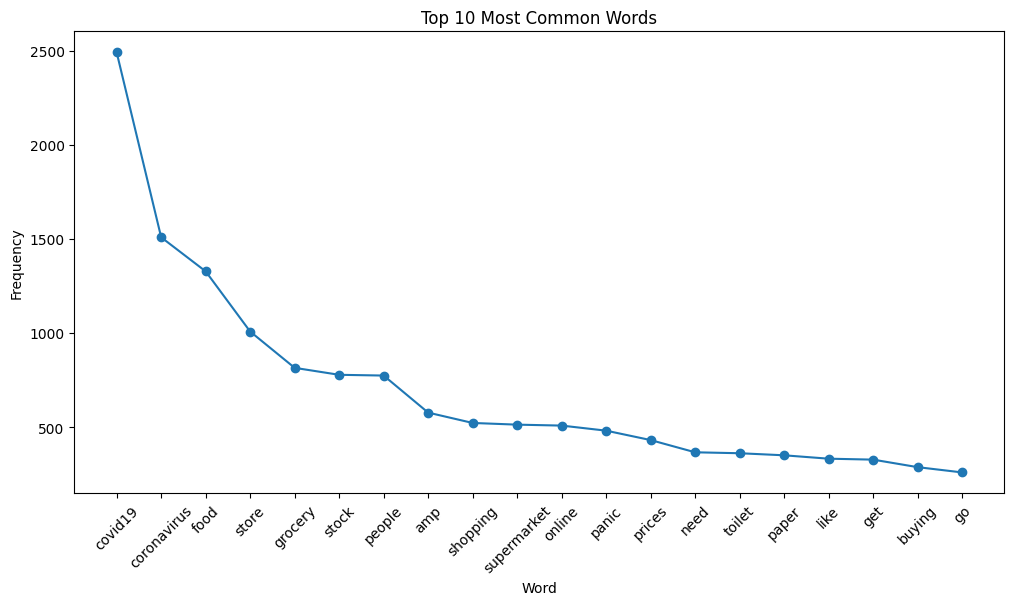

In [20]:
import matplotlib.pyplot as plt

# Get the top 10 words and their frequencies
top_words = word_frequency.most_common(20)
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# Create a line graph with a larger figure size
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(words, frequencies, marker='o')

# Add labels and title
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Most Common Words')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the chart to a file
plt.savefig('WordCount.png')

# Display the chart
plt.show()


**d. Create word clouds**

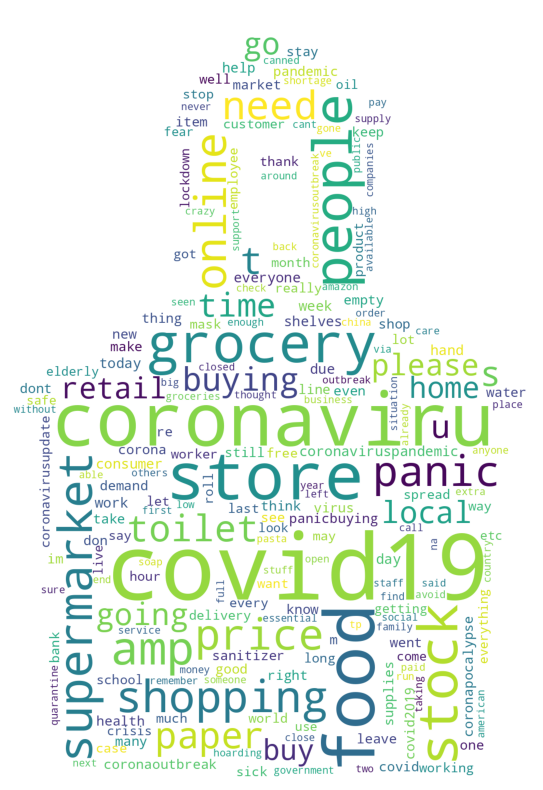

In [36]:
#Wordcloud Library 
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# converting the list to sentance
# Combine all tweets into a single string
combined_text = ' '.join([' '.join(tweet_tokens) for tweet_tokens in filtered_words])

# Mapping the data with image
Mask = np.array(Image.open(requests.get('http://clipart-library.com/newimages/school-clip-art-2.jpg', stream=True).raw))

# Considering the color of the image and imposing on the wordcloud
image_colors = ImageColorGenerator(Mask)

#Creating the wordcloud 
wordcloud = WordCloud(background_color='white', height=1200, width=1200,mask=Mask,collocations=False).generate(combined_text)

#Plotting the wordcloud :
plt.figure(figsize = (12, 10)) 
plt.imshow(wordcloud) 
plt.axis("off") 

plt.savefig("WordCloud.png")
plt.show()
